<a href="https://colab.research.google.com/github/fahriyegrl/bitcoin_predict_time_series_tensorflow/blob/main/bitcoin_prediction_time_series_forecasting_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Getting and downloading then Bitcoin historical data from here: https://coincodex.com/crypto/bitcoin/historical-data/

In [3]:
!wget https://github.com/fahriyegrl/bitcoin_predict_time_series_tensorflow/raw/main/bitcoin_2019-08-26_2024-08-24.csv

--2024-09-01 02:47:34--  https://github.com/fahriyegrl/bitcoin_predict_time_series_tensorflow/raw/main/bitcoin_2019-08-26_2024-08-24.csv
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/fahriyegrl/bitcoin_predict_time_series_tensorflow/main/bitcoin_2019-08-26_2024-08-24.csv [following]
--2024-09-01 02:47:35--  https://raw.githubusercontent.com/fahriyegrl/bitcoin_predict_time_series_tensorflow/main/bitcoin_2019-08-26_2024-08-24.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 204004 (199K) [text/plain]
Saving to: ‘bitcoin_2019-08-26_2024-08-24.csv’

bitcoin_2019-08-26_ 100%[===================>

In [4]:
import pandas as pd

df = pd.read_csv('bitcoin_2019-08-26_2024-08-24.csv')
df.head()

,Start,End,Open,High,Low,Close,Volume,Market Cap
0,2024-08-23,2024-08-24,60392.09,64851.37,60392.09,63979.97,1.096811e+11,1.218889e+12
1,2024-08-22,2024-08-23,61167.48,61379.44,59953.14,60386.02,1.099257e+11,1.197426e+12
2,2024-08-21,2024-08-22,59114.41,61813.19,58907.09,61109.99,1.094567e+11,1.180932e+12
3,2024-08-20,2024-08-21,59448.00,61315.96,58705.68,59056.01,1.036199e+11,1.185949e+12
4,2024-08-19,2024-08-20,58320.02,59562.71,57928.86,59562.71,9.317886e+10,1.157509e+12


In [5]:
df.tail()

,Start,End,Open,High,Low,Close,Volume,Market Cap
1820,2019-08-30,2019-08-31,9499.878802,9640.946925,9409.399994,9582.255358,1.614085e+10,1.709868e+11
1821,2019-08-29,2019-08-30,9755.839220,9755.839220,9388.612159,9493.755389,2.061784e+10,1.707816e+11
1822,2019-08-28,2019-08-29,10206.418980,10270.522245,9691.877126,9759.791528,1.522129e+10,1.803473e+11
1823,2019-08-27,2019-08-28,10380.720317,10380.720317,10090.229211,10219.413373,1.570331e+10,1.826662e+11
1824,2019-08-26,2019-08-27,10150.617721,10556.072516,10150.617721,10374.876617,1.716487e+10,1.852813e+11


In [6]:
df = pd.read_csv('bitcoin_2019-08-26_2024-08-24.csv',
                 parse_dates=['Start'],
                 index_col= ['Start'])
df.head()

,End,Open,High,Low,Close,Volume,Market Cap
Start,,,,,,,
2024-08-23,2024-08-24,60392.09,64851.37,60392.09,63979.97,1.096811e+11,1.218889e+12
2024-08-22,2024-08-23,61167.48,61379.44,59953.14,60386.02,1.099257e+11,1.197426e+12
2024-08-21,2024-08-22,59114.41,61813.19,58907.09,61109.99,1.094567e+11,1.180932e+12
2024-08-20,2024-08-21,59448.00,61315.96,58705.68,59056.01,1.036199e+11,1.185949e+12
2024-08-19,2024-08-20,58320.02,59562.71,57928.86,59562.71,9.317886e+10,1.157509e+12


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1825 entries, 2024-08-23 to 2019-08-26
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   End         1825 non-null   object 
 1   Open        1825 non-null   float64
 2   High        1825 non-null   float64
 3   Low         1825 non-null   float64
 4   Close       1825 non-null   float64
 5   Volume      1825 non-null   float64
 6   Market Cap  1825 non-null   float64
dtypes: float64(6), object(1)
memory usage: 114.1+ KB


In [8]:
len(df)

1825

In [9]:
bitcoin_price_reversed = df.iloc[::-1]
bitcoin_price = pd.DataFrame(bitcoin_price_reversed['Close']).rename(columns={'Close':'price'})
bitcoin_price.head()

,price
Start,
2019-08-26,10374.876617
2019-08-27,10219.413373
2019-08-28,9759.791528
2019-08-29,9493.755389
2019-08-30,9582.255358


In [10]:
bitcoin_price.index.dtype

dtype('<M8[ns]')

In [11]:
len(bitcoin_price), bitcoin_price.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1825 entries, 2019-08-26 to 2024-08-23
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   price   1825 non-null   float64
dtypes: float64(1)
memory usage: 28.5 KB


(1825, None)

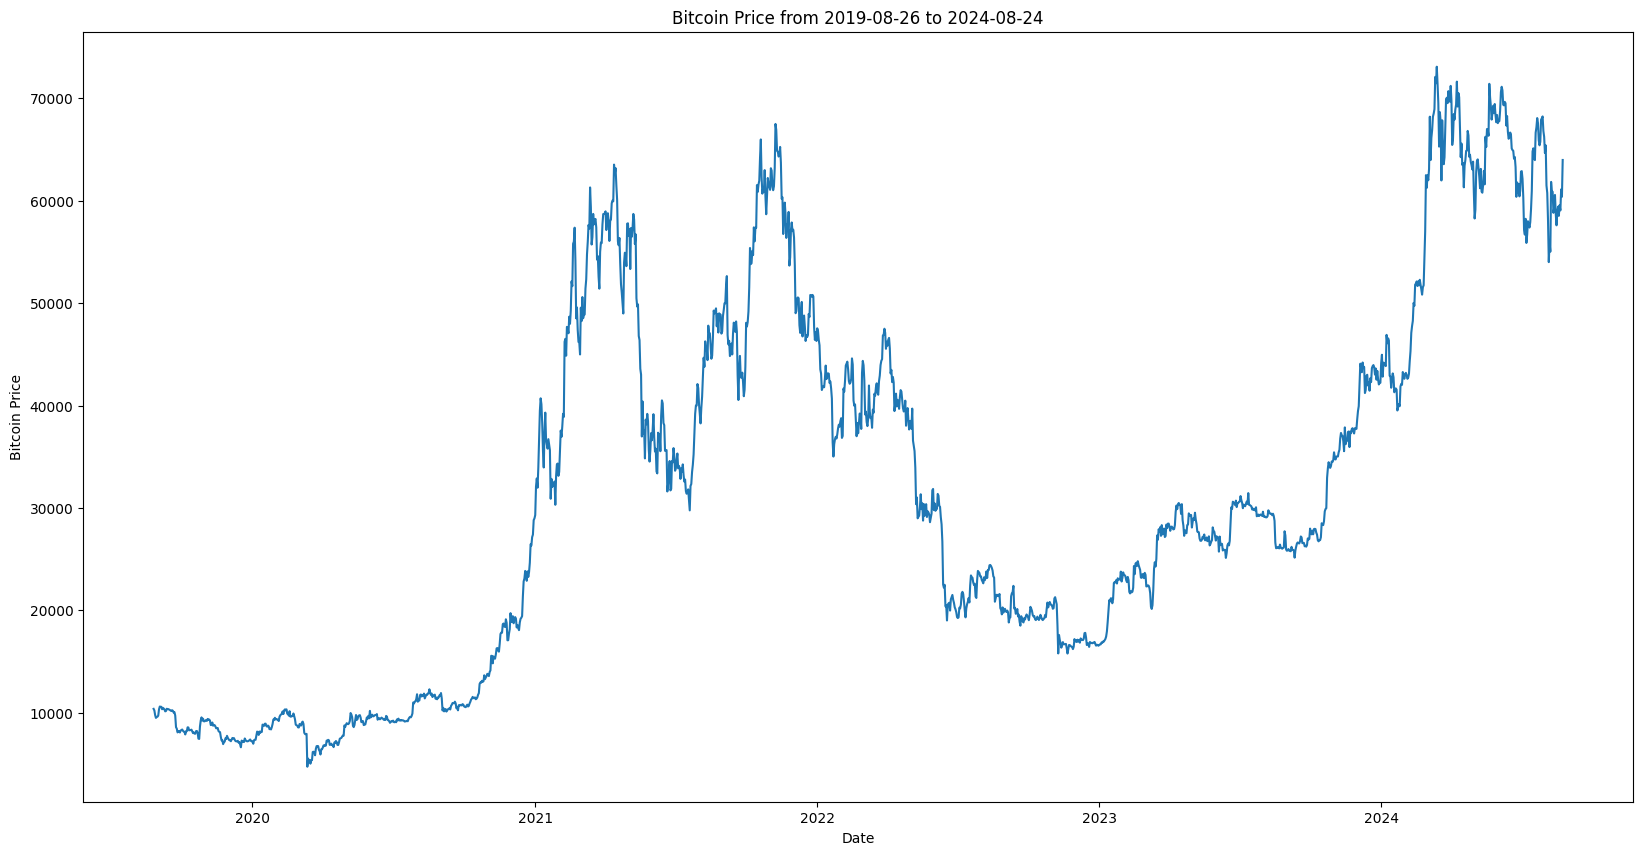

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plt.plot(bitcoin_price)
plt.ylabel("Bitcoin Price")
plt.title("Bitcoin Price from 2019-08-26 to 2024-08-24")
plt.xlabel("Date")

plt.show()

In [13]:
bitcoin_price[:5]

,price
Start,
2019-08-26,10374.876617
2019-08-27,10219.413373
2019-08-28,9759.791528
2019-08-29,9493.755389
2019-08-30,9582.255358


In [14]:
timesteps = bitcoin_price.index.to_numpy()
prices = bitcoin_price['price'].to_numpy()

timesteps[:5], prices[:5]

(array(['2019-08-26T00:00:00.000000000', '2019-08-27T00:00:00.000000000',
        '2019-08-28T00:00:00.000000000', '2019-08-29T00:00:00.000000000',
        '2019-08-30T00:00:00.000000000'], dtype='datetime64[ns]'),
 array([10374.87661724, 10219.41337325,  9759.79152841,  9493.75538921,
         9582.25535778]))

In [15]:
split = int(len(prices)  * 0.8)
split

1460

In [16]:
from os import X_OK
## Creating train and test datasets

# split = int(len(bitcoin_price)  * 0.8)
# split

X_train, y_train = timesteps[:split], prices[:split]
X_test, y_test = timesteps[split:], prices[split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(1460, 1460, 365, 365)

In [17]:
X_test.shape

(365,)

In [18]:
timesteps[:1]

array(['2019-08-26T00:00:00.000000000'], dtype='datetime64[ns]')

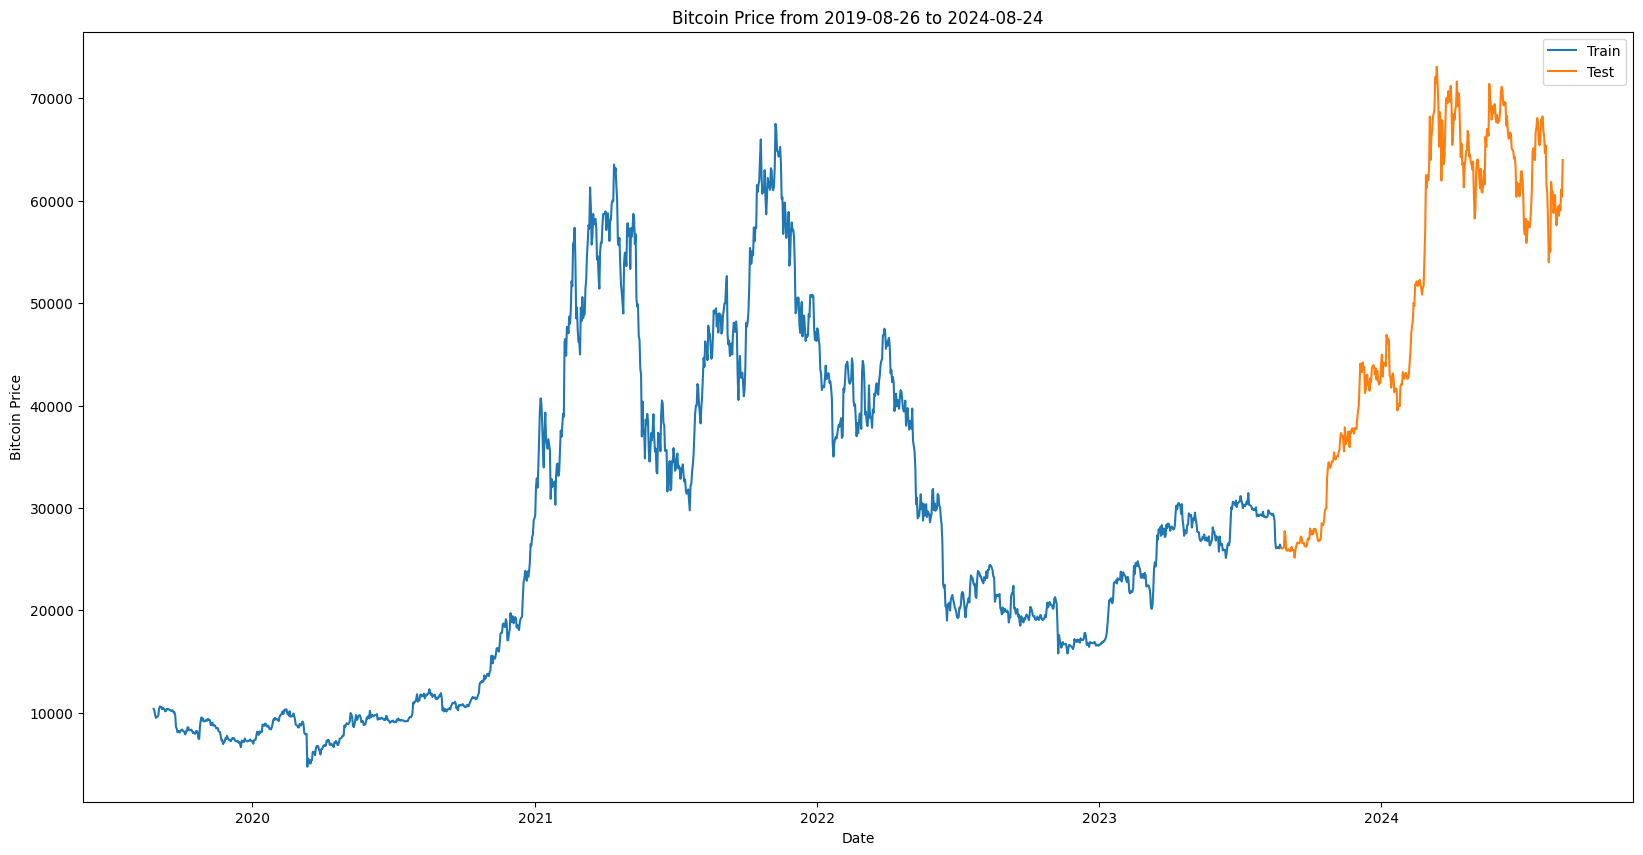

In [19]:
plt.figure(figsize=(20,10))
plt.plot(X_train, y_train)
plt.plot(X_test, y_test)
plt.legend(['Train', 'Test'])
plt.ylabel("Bitcoin Price")
plt.title("Bitcoin Price from 2019-08-26 to 2024-08-24")
plt.xlabel("Date")

plt.show()

In [20]:
## plot time series function to use later

def plot_time_series(timesteps, values, start=0, end=None, label=None ):

  plt.plot(timesteps[start:end], values[start:end])
  plt.xlabel("Time")
  plt.ylabel("Value")
  if label:
    plt.legend([label])
  plt.grid(True)

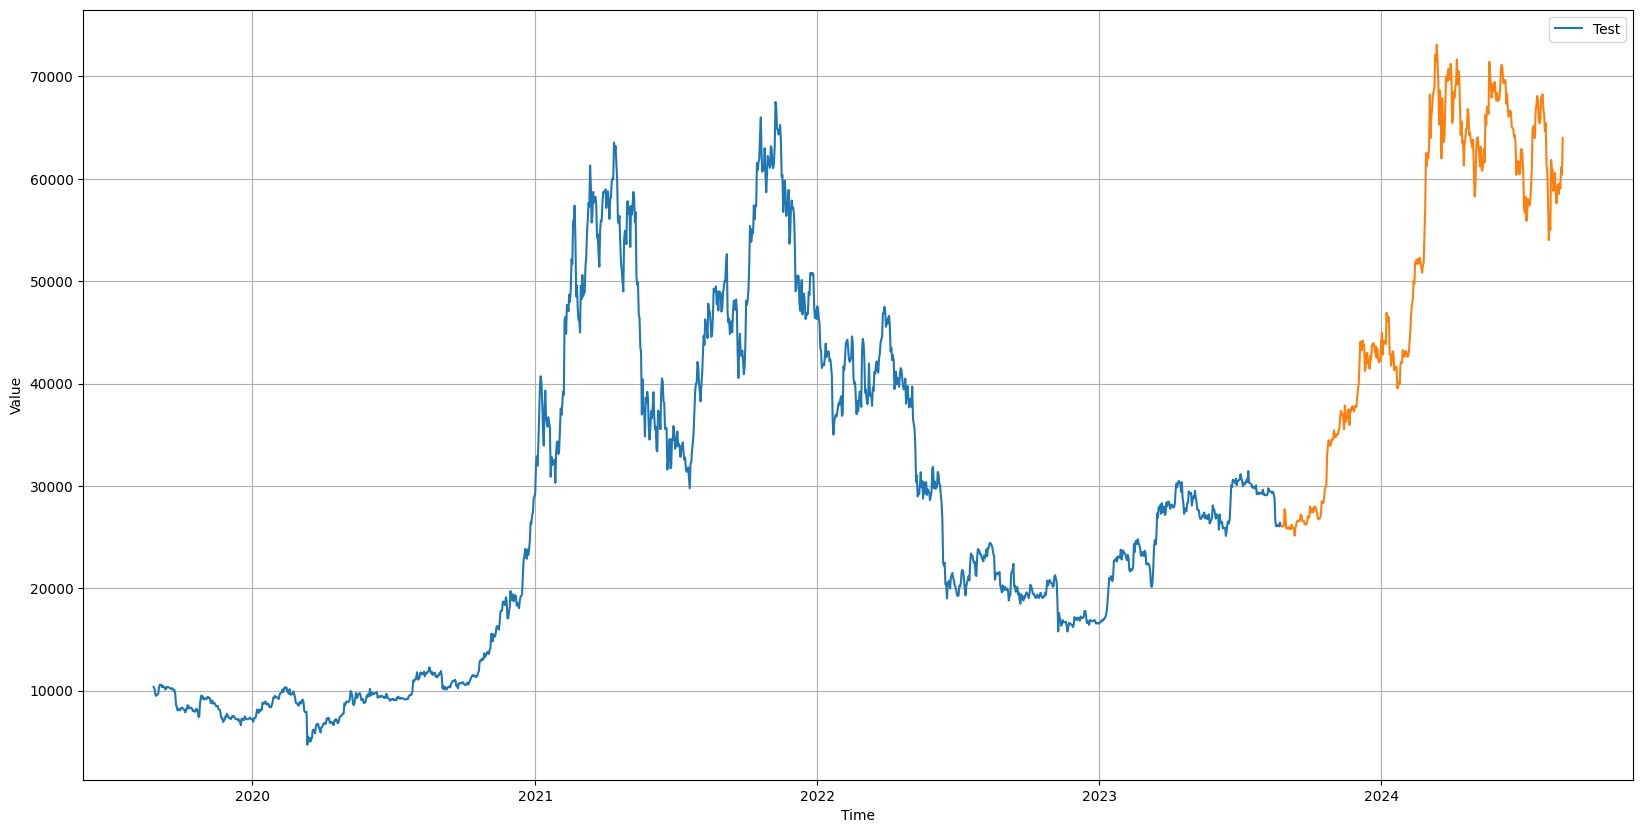

In [21]:
plt.figure(figsize=(20,10))
plot_time_series(timesteps=X_train, values = y_train, label='Train')
plot_time_series(timesteps=X_test, values = y_test, label='Test')

In [22]:
## Model 1: In this model, the prediction at time will be the value at time-1.

#

base_forecast = y_test[:-1]
base_forecast[:10]

array([26058.22, 26021.02, 26088.38, 26127.89, 27718.23, 27316.23,
       25936.45, 25816.57, 25856.93, 25980.6 ])

In [23]:
y_test[:10]

array([26058.22, 26021.02, 26088.38, 26127.89, 27718.23, 27316.23,
       25936.45, 25816.57, 25856.93, 25980.6 ])

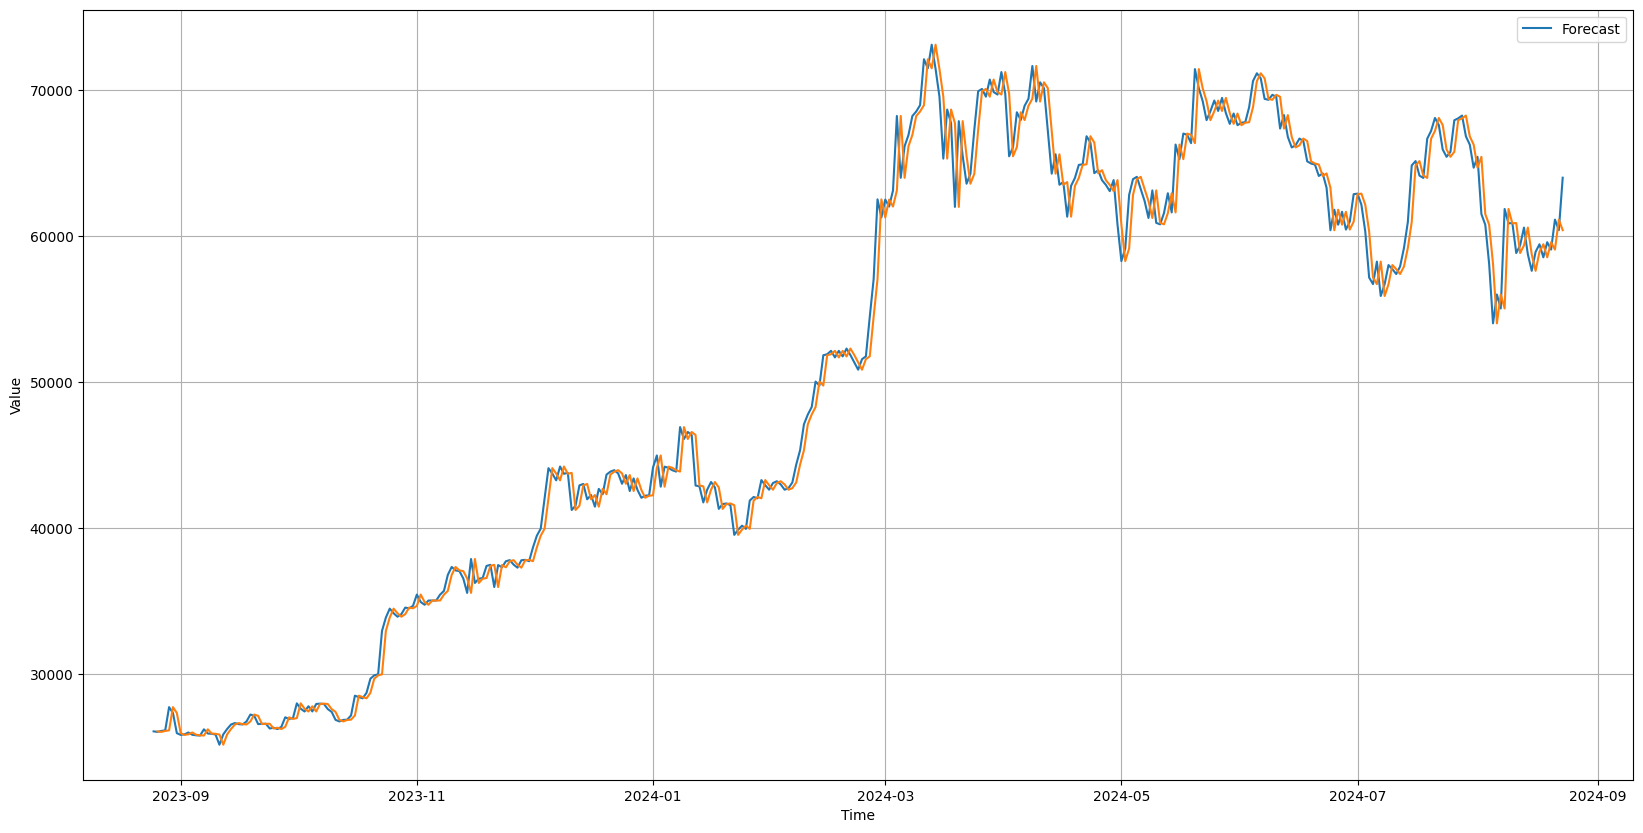

In [24]:
plt.figure(figsize=(20,10))
plot_time_series(timesteps=X_test, values = y_test, label='Test')
plot_time_series(timesteps=X_test[1:], values = base_forecast, label='Forecast')

In [25]:
import tensorflow as tf


#Regression metrics (which can also be used for time series forecasting):  lower is better.

# MAE - mean absolute error
# MSE - mean squared error
# RMSE - root mean square error
# MAPE/sMAPE - (symmetric) mean absolute percentage error


def evaluation(y_true, y_pred):

  mae_metric = tf.keras.metrics.MeanAbsoluteError()
  mae= mae_metric(y_true, y_pred)

  mse_metric = tf.keras.metrics.MeanSquaredError()
  mse = mse_metric(y_true, y_pred)

  rmse = tf.sqrt(mse)


  mape_metric = tf.keras.metrics.MeanAbsolutePercentageError()
  mape = mape_metric(y_true, y_pred)


  return {"mae": mae.numpy(),
          "mse": mse.numpy(),
          "mape": mape.numpy()}


In [26]:
_base_forecast_evaluation = evaluation(y_test[1:], base_forecast)
_base_forecast_evaluation

{'mae': 996.01025, 'mse': 2205020.5, 'mape': 1.8600316}

In [27]:
## Updating the datasets to WINDOW and HORIZON

HORIZON = 1 # to predict one/next day
WINDOW = 7 # use the past seven days to predict Horizon


 ## Just trial on small data
def get_label_window(x, horizon=HORIZON):

  return x[:, :-horizon], x[:, -horizon:]

In [28]:
tf.range(8)

<tf.Tensor: shape=(8,), dtype=int32, numpy=array([0, 1, 2, 3, 4, 5, 6, 7], dtype=int32)>

In [29]:
fake_window, fake_label =  get_label_window(tf.expand_dims(tf.range(8), axis=0))
tf.squeeze(fake_window).numpy, tf.squeeze(fake_label).numpy

(<bound method _EagerTensorBase.numpy of <tf.Tensor: shape=(7,), dtype=int32, numpy=array([0, 1, 2, 3, 4, 5, 6], dtype=int32)>>,
 <bound method _EagerTensorBase.numpy of <tf.Tensor: shape=(), dtype=int32, numpy=7>>)

In [30]:
import numpy as np

window_size = 7
horizon = 1

window_step = window_size + horizon

np.arange(window_size + horizon)

window_step = np.expand_dims(np.arange(window_size + horizon),axis=0)  ## 2D
window_step

array([[0, 1, 2, 3, 4, 5, 6, 7]])

In [31]:
prices[:10], len(prices)

(array([10374.87661724, 10219.41337325,  9759.79152841,  9493.75538921,
         9582.25535778,  9609.78764737,  9716.72190969, 10329.85905157,
        10603.09546299, 10578.32020957]),
 1825)

In [32]:
window_index = window_step + np.expand_dims(np.arange(len(prices[:14]) - (window_size + horizon) - 1), axis=0).T

window_index

array([[ 0,  1,  2,  3,  4,  5,  6,  7],
       [ 1,  2,  3,  4,  5,  6,  7,  8],
       [ 2,  3,  4,  5,  6,  7,  8,  9],
       [ 3,  4,  5,  6,  7,  8,  9, 10],
       [ 4,  5,  6,  7,  8,  9, 10, 11]])

In [33]:
windows = prices[:14][window_index]
windows

array([[10374.87661724, 10219.41337325,  9759.79152841,  9493.75538921,
         9582.25535778,  9609.78764737,  9716.72190969, 10329.85905157],
       [10219.41337325,  9759.79152841,  9493.75538921,  9582.25535778,
         9609.78764737,  9716.72190969, 10329.85905157, 10603.09546299],
       [ 9759.79152841,  9493.75538921,  9582.25535778,  9609.78764737,
         9716.72190969, 10329.85905157, 10603.09546299, 10578.32020957],
       [ 9493.75538921,  9582.25535778,  9609.78764737,  9716.72190969,
        10329.85905157, 10603.09546299, 10578.32020957, 10574.499542  ],
       [ 9582.25535778,  9609.78764737,  9716.72190969, 10329.85905157,
        10603.09546299, 10578.32020957, 10574.499542  , 10339.45563157]])

In [34]:
## Bitcoinn prices = turn them to (Window, Horizon) 2D array

def make_windows(x, window_size= WINDOW, horizon=HORIZON):

  window_step = np.expand_dims(np.arange(window_size + horizon),axis=0)

  window_index = window_step + np.expand_dims(np.arange(len(x) - (window_size + horizon - 1)), axis=0).T

  windows = x[window_index]

  window, label = get_label_window(windows, horizon= horizon)

  return window, label

In [35]:
len(prices)

1825

In [36]:
all_windows, all_labels = make_windows(prices,window_size=window_size,horizon=horizon )

len(all_windows), len(all_labels)

(1818, 1818)

In [37]:
all_windows[1].shape, all_labels[1].shape

((7,), (1,))

In [38]:
for i in range(5):
  print(all_windows[i], all_labels[i])

[10374.87661724 10219.41337325  9759.79152841  9493.75538921
  9582.25535778  9609.78764737  9716.72190969] [10329.85905157]
[10219.41337325  9759.79152841  9493.75538921  9582.25535778
  9609.78764737  9716.72190969 10329.85905157] [10603.09546299]
[ 9759.79152841  9493.75538921  9582.25535778  9609.78764737
  9716.72190969 10329.85905157 10603.09546299] [10578.32020957]
[ 9493.75538921  9582.25535778  9609.78764737  9716.72190969
 10329.85905157 10603.09546299 10578.32020957] [10574.499542]
[ 9582.25535778  9609.78764737  9716.72190969 10329.85905157
 10603.09546299 10578.32020957 10574.499542  ] [10339.45563157]


In [39]:
### Getiing Test and Train Data

split = int(len(prices)  * 0.8)


X_train, y_train = all_windows[:split], all_labels[:split]
X_test, y_test = all_windows[split:], all_labels[split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(1460, 1460, 358, 358)

In [40]:
split

1460

In [41]:
len(all_windows), len(all_labels)


(1818, 1818)

In [42]:
X_train[:3], y_train[:3]

(array([[10374.87661724, 10219.41337325,  9759.79152841,  9493.75538921,
          9582.25535778,  9609.78764737,  9716.72190969],
        [10219.41337325,  9759.79152841,  9493.75538921,  9582.25535778,
          9609.78764737,  9716.72190969, 10329.85905157],
        [ 9759.79152841,  9493.75538921,  9582.25535778,  9609.78764737,
          9716.72190969, 10329.85905157, 10603.09546299]]),
 array([[10329.85905157],
        [10603.09546299],
        [10578.32020957]]))

In [43]:
X_test[:3], y_test[:3]

(array([[26058.22, 26021.02, 26088.38, 26127.89, 27718.23, 27316.23,
         25936.45],
        [26021.02, 26088.38, 26127.89, 27718.23, 27316.23, 25936.45,
         25816.57],
        [26088.38, 26127.89, 27718.23, 27316.23, 25936.45, 25816.57,
         25856.93]]),
 array([[25816.57],
        [25856.93],
        [25980.6 ]]))

In [44]:
## Create a checkpoint callback

import os

def checkpoint(model_name, save_path="model_experiments"):
  return tf.keras.callbacks.ModelCheckpoint(filepath=os.path.join(save_path, model_name + ".keras"),
                                            monitor="val_loss",
                                            verbose=0,
                                            save_best_only=True)

In [45]:
## Model 2: with single dense layer (window=7, horizon=1), Adam opt, MAE loss function
from tensorflow.keras import layers
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
    layers.Dense(units=128, activation="relu"),
    layers.Dense(HORIZON, activation="linear")
], name="model_2")

model_2.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae", "mse"])

model_2.fit(x=X_train,
            y=y_train,
            epochs=100,
            verbose=1,
            batch_size=128,
            validation_data=(X_test, y_test),
            callbacks=[checkpoint(model_name="model_2.name")])


Epoch 1/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 11s 460ms/step - loss: 26677.1992 - mae: 26677.1992 - mse: 981624384.0000 - val_loss: 22439.7812 - val_mae: 22439.7812 - val_mse: 548165376.0000
Epoch 2/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 7129.0786 - mae: 7129.0786 - mse: 85634080.0000 - val_loss: 7852.2319 - val_mae: 7852.2319 - val_mse: 73374392.0000
Epoch 3/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 3498.3398 - mae: 3498.3398 - mse: 20508672.0000 - val_loss: 3628.6499 - val_mae: 3628.6499 - val_mse: 17603184.0000
Epoch 4/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 1849.0629 - mae: 1849.0629 - mse: 6409035.5000 - val_loss: 2206.1033 - val_mae: 2206.1033 - val_mse: 8298826.5000
Epoch 5/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 1270.1919 - mae: 1270.1919 - mse: 3729317.0000 - val_loss: 1673.9387 - val_mae: 1673.9387 - val_mse: 5329170.0000
Epoch 6/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 1084.8037 - mae: 1084.8037 - mse: 2973256.0000 - val_los

In [46]:
model_2.evaluate(X_test, y_test)

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 820.4826 - mae: 820.4826 - mse: 1585074.0000


[1085.56494140625, 1085.56494140625, 2487309.5]

In [47]:
## Loading the best model

model_2 = tf.keras.models.load_model("model_experiments/model_2.name.keras")
model_2.evaluate(X_test, y_test)

12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 795.4720 - mae: 795.4720 - mse: 1531148.5000


[1062.00341796875, 1062.00341796875, 2419406.75]

In [48]:
## Make a prediction

forecast = model_2.predict(X_test)
forecast.shape

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


(358, 1)

In [49]:
forecast[:10]

array([[26327.295],
       [25707.623],
       [25516.926],
       [25721.451],
       [25690.91 ],
       [25626.973],
       [25609.287],
       [25918.432],
       [25844.193],
       [25780.783]], dtype=float32)

In [50]:
X_test.shape

(358, 7)

In [51]:
tf.squeeze(X_test).shape

TensorShape([358, 7])

In [52]:
model_2_evaluation = evaluation(y_test, forecast)
model_2_evaluation

{'mae': 1062.0034, 'mse': 2419406.8, 'mape': 1.9955587}

In [53]:
_base_forecast_evaluation

{'mae': 996.01025, 'mse': 2205020.5, 'mape': 1.8600316}

In [54]:
timesteps[:1]

array(['2019-08-26T00:00:00.000000000'], dtype='datetime64[ns]')

In [55]:
len(timesteps[1:])

1824

In [56]:
len(X_test), len(X_train), len(y_test), len(timesteps)

(358, 1460, 358, 1825)

In [57]:
X_test.shape

(358, 7)

In [58]:
timesteps.shape, bitcoin_price.shape

((1825,), (1825, 1))

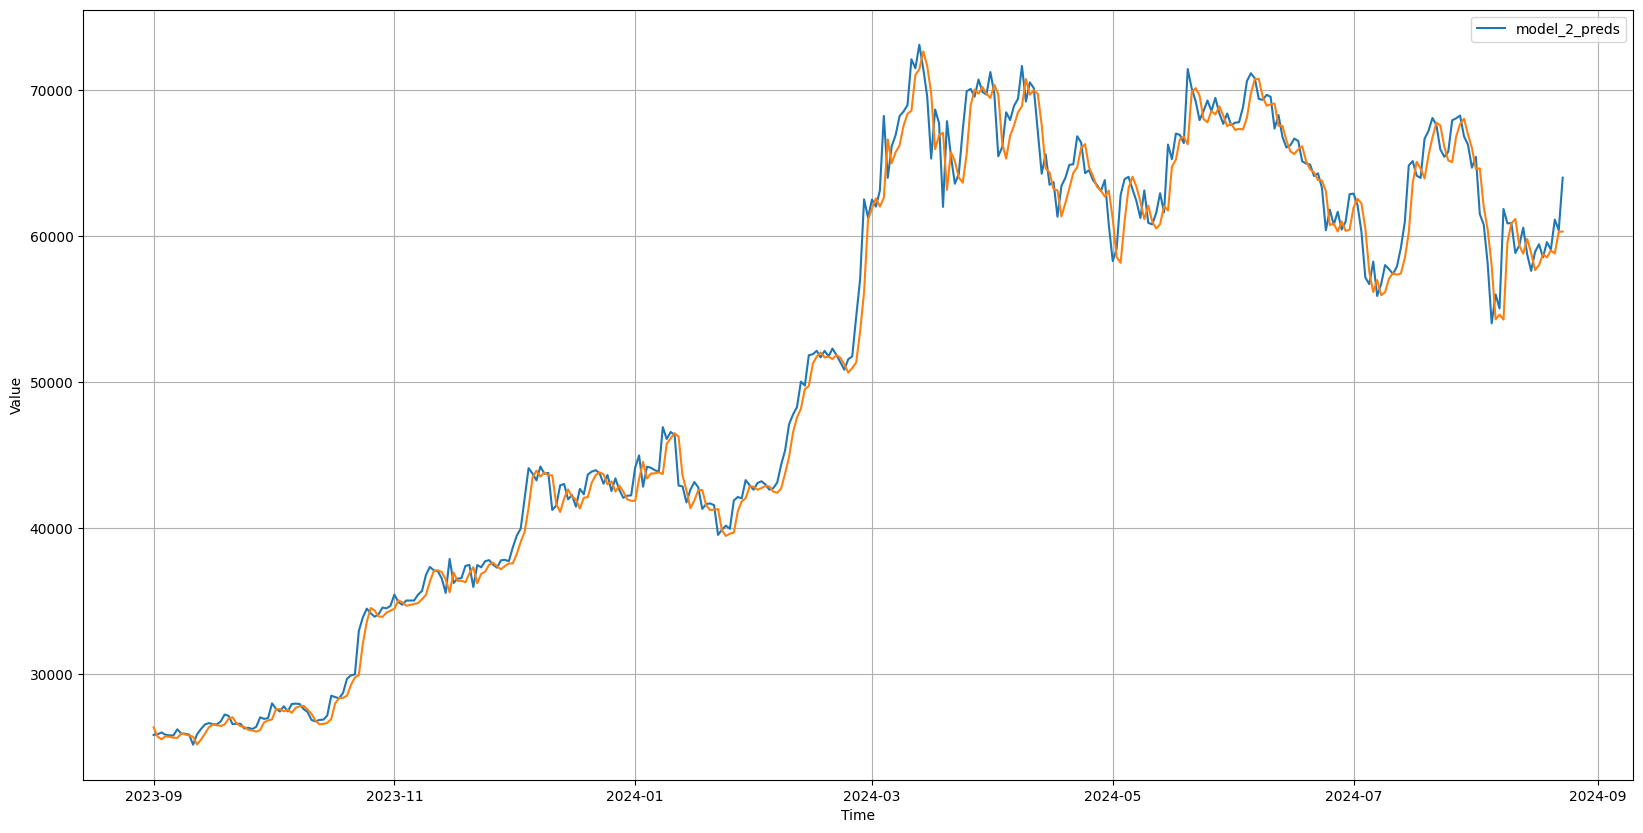

In [59]:
## Ploting the model_2 prediction

plt.figure(figsize=(20,10))
plot_time_series(timesteps= timesteps[1467:], values= bitcoin_price[1467:] ,label="Test")

plot_time_series(timesteps= timesteps[1467:],
                values= forecast,
                label="model_2_preds")

## Model 3:  Same model as Model 2 but 30 days window size and 1 day horizo


In [60]:
HORIZON = 1
WINDOW = 30

all_window, all_label = make_windows(prices, window_size=WINDOW, horizon=HORIZON)

len(all_window), len(all_label), len(prices)

(1795, 1795, 1825)

In [61]:
split, all_window[1].shape, all_label[1].shape

(1460, (30,), (1,))

In [62]:
## Train and test data

train_window , test_window, train_label, test_label = all_windows[:split], all_windows[split:], all_labels[:split], all_labels[split:]

len(train_window), len(test_window), len(train_label), len(test_label)

(1460, 358, 1460, 358)

In [63]:
train_window[:3], train_label[:3]

(array([[10374.87661724, 10219.41337325,  9759.79152841,  9493.75538921,
          9582.25535778,  9609.78764737,  9716.72190969],
        [10219.41337325,  9759.79152841,  9493.75538921,  9582.25535778,
          9609.78764737,  9716.72190969, 10329.85905157],
        [ 9759.79152841,  9493.75538921,  9582.25535778,  9609.78764737,
          9716.72190969, 10329.85905157, 10603.09546299]]),
 array([[10329.85905157],
        [10603.09546299],
        [10578.32020957]]))

In [64]:
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
    layers.Dense(units=128, activation="relu"),
    layers.Dense(HORIZON)
], name="model_3")

model_3.compile(loss="mae",
                optimizer = tf.keras.optimizers.Adam(),
                metrics=["mae", "mse"])

model_3.fit(x=train_window, y=train_label,
            epochs=100,
            batch_size=32,
            verbose=0,
            validation_data=(test_window, test_label),
            callbacks=[checkpoint(model_name="model_3.name")])

In [65]:
model_3.evaluate(test_window, test_label)

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1130.5490 - mae: 1130.5490 - mse: 2313048.2500


[1409.4974365234375, 1409.4974365234375, 3462564.5]

In [66]:
model_3= tf.keras.models.load_model("model_experiments/model_3.name.keras")
model_3.evaluate(test_window, test_label)

12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 874.5823 - mae: 874.5823 - mse: 1691867.2500


[1140.2147216796875, 1140.2147216796875, 2619885.75]

In [67]:
model_3_forecast = model_3.predict(test_window)
model_3_forecast.shape, tf.squeeze(test_window).shape


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


((358, 1), TensorShape([358, 7]))

In [68]:
model_3_evaluation = evaluation(test_label, model_3_forecast)
model_3_evaluation

{'mae': 1140.2147, 'mse': 2619885.8, 'mape': 2.160279}

In [69]:
model_2_evaluation

{'mae': 1062.0034, 'mse': 2419406.8, 'mape': 1.9955587}

In [70]:
timesteps.shape, bitcoin_price.shape

((1825,), (1825, 1))

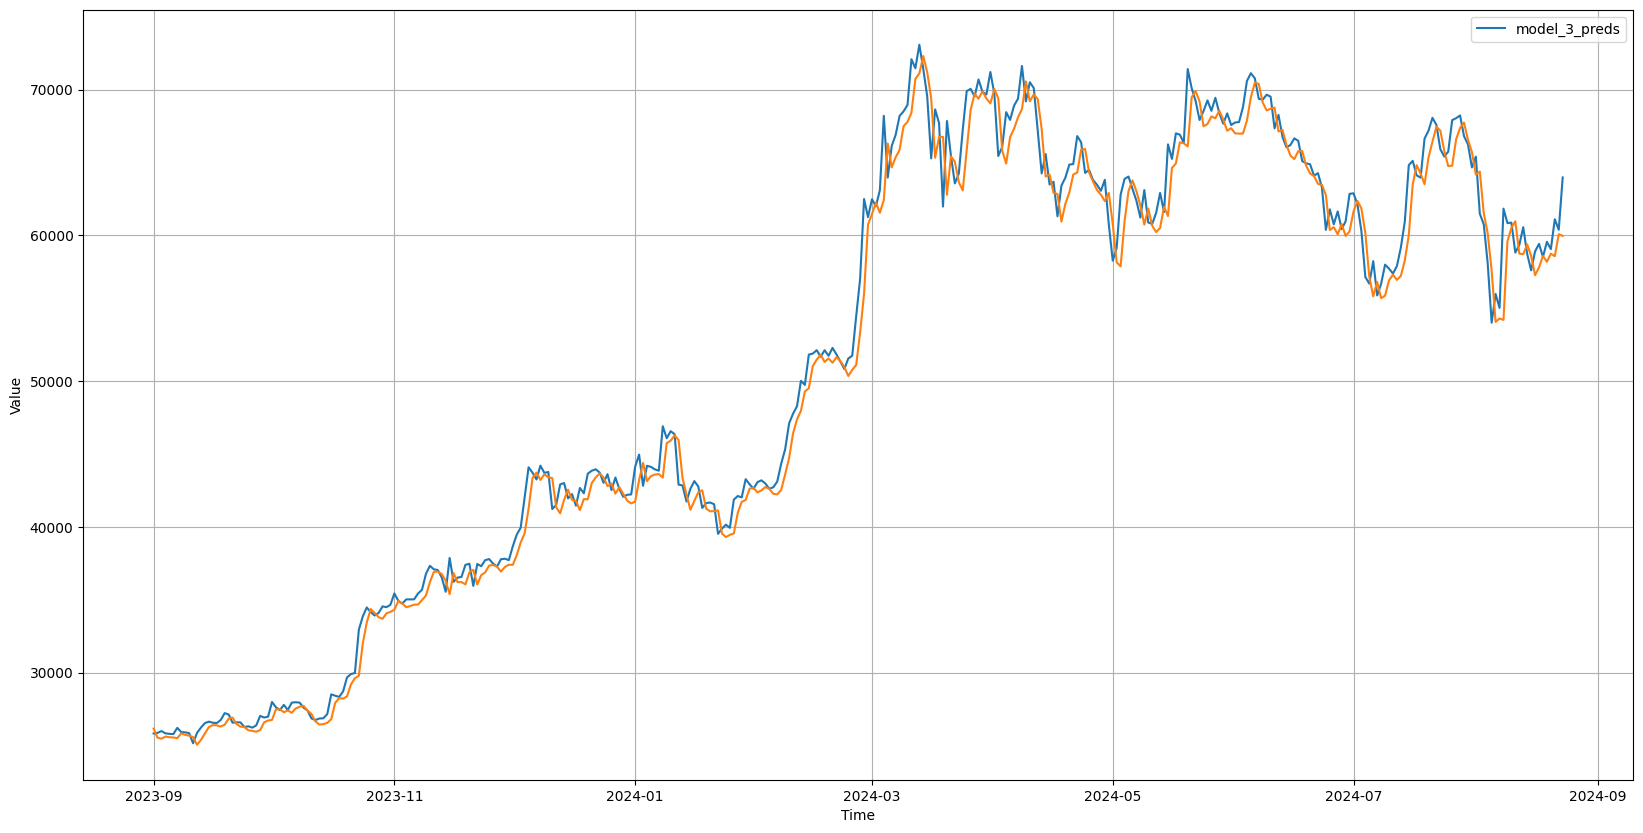

In [71]:
## Ploting the model_3 prediction

plt.figure(figsize=(20,10))
plot_time_series(timesteps= timesteps[1467:], values= bitcoin_price[1467:] ,label="Test")

plot_time_series(timesteps= timesteps[1467:],
                values= model_3_forecast,
                label="model_3_preds")

## Model 4: Window=30 and horizon=7

In [72]:
prices[:3], prices[-3:]

(array([10374.87661724, 10219.41337325,  9759.79152841]),
 array([61109.99, 60386.02, 63979.97]))

In [73]:
bitcoin_price[:3]

,price
Start,
2019-08-26,10374.876617
2019-08-27,10219.413373
2019-08-28,9759.791528


In [74]:
HORIZON = 7
WINDOW = 30

In [75]:
import numpy as np

def make_windows(x, window_size=WINDOW, horizon=HORIZON):


  window_step = np.expand_dims(np.arange(window_size+horizon), axis=0)


  window_indexes = window_step + np.expand_dims(np.arange(len(x)-(window_size+horizon-1)), axis=0).T

  windowed_array = x[window_indexes]

  windows, labels = get_label_window(windowed_array, horizon=horizon)
  return windows, labels

In [76]:
HORIZON = 7
WINDOW = 30

all_window, all_label = make_windows(prices, window_size=30, horizon=7)

len(all_window), len(all_label), len(prices)

(1789, 1789, 1825)

In [77]:
all_window[1], all_label[1]

(array([10219.41337325,  9759.79152841,  9493.75538921,  9582.25535778,
         9609.78764737,  9716.72190969, 10329.85905157, 10603.09546299,
        10578.32020957, 10574.499542  , 10339.45563157, 10477.09483846,
        10410.18764404, 10322.05760789, 10132.54480456, 10159.72047332,
        10387.51484121, 10346.59919496, 10353.54979822, 10313.44352598,
        10268.65798496, 10208.16581794, 10164.10190487, 10241.60879539,
        10179.86223084, 10006.06533083, 10050.18754113,  9719.39701861,
         8588.42490586,  8439.8461899 ]),
 array([8077.93635444, 8183.56987236, 8208.59598768, 8068.66873829,
        8269.02868158, 8294.74359665, 8361.91923314]))

In [78]:
all_label[1], all_label[1].shape, all_window[1].shape

(array([8077.93635444, 8183.56987236, 8208.59598768, 8068.66873829,
        8269.02868158, 8294.74359665, 8361.91923314]),
 (7,),
 (30,))

In [79]:
train_window , test_window, train_label, test_label = all_windows[split:], all_windows[:split], all_labels[split:], all_labels[:split]

len(train_window), len(test_window), len(train_label), len(test_label)

(358, 1460, 358, 1460)

In [80]:
train_window.shape, train_label.shape, test_window.shape, test_label.shape

((358, 7), (358, 1), (1460, 7), (1460, 1))

In [81]:
tf.random.set_seed(42)

model_4 = tf.keras.Sequential([
    layers.Dense(units=128, activation="relu"),
    layers.Dense(HORIZON)
], name="model_4")

model_4.compile(loss="MAE",
                optimizer = tf.keras.optimizers.Adam())

model_4.fit(train_window,
            train_label,
            batch_size=128,
            epochs=100,
            verbose=0,
            validation_data=(test_window, test_label),
            callbacks=[checkpoint(model_name="model_4.name")])



In [82]:
model_4.evaluate(test_window, test_label)

46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 948.2780


1219.0848388671875

In [83]:
model_4 = tf.keras.models.load_model("model_experiments/model_4.name.keras")
model_4.evaluate(test_window, test_label)

46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 948.2780


1219.0848388671875

In [84]:
model_4.predict(test_window)

46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


array([[ 9908.508,  9915.912,  9916.133, ...,  9883.91 ,  9796.799,
         9899.   ],
       [ 9890.742,  9875.582,  9953.066, ...,  9865.13 ,  9858.22 ,
         9737.501],
       [10013.601,  9864.025, 10066.88 , ...,  9925.115,  9822.116,
         9829.13 ],
       ...,
       [26309.465, 26331.742, 26269.129, ..., 26302.85 , 26246.795,
        26393.678],
       [26498.652, 26628.541, 26718.588, ..., 26604.838, 26586.938,
        26345.883],
       [26918.889, 26465.346, 26827.963, ..., 26587.494, 26299.5  ,
        26650.645]], dtype=float32)

In [85]:
model_4_forecast = model_4.predict(test_window)
model_4_forecast.shape, tf.squeeze(test_window).shape

46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


((1460, 7), TensorShape([1460, 7]))

In [86]:
model_4_evaluation = evaluation(test_label, model_4_forecast)
model_4_evaluation

{'mae': 1219.0847, 'mse': 3804748.0, 'mape': 4.3935533}

In [87]:
model_3_evaluation, model_2_evaluation

({'mae': 1140.2147, 'mse': 2619885.8, 'mape': 2.160279},
 {'mae': 1062.0034, 'mse': 2419406.8, 'mape': 1.9955587})

##  Model 5 : Conv1
Conv1 models can be used seq2seq problems.
WINDOW = 7 and HORIZON=1 many to one problem.

In [88]:
HORIZON = 1
WINDOW = 7

In [89]:
all_window, all_label = make_windows(prices, window_size=WINDOW,horizon=HORIZON )
len(all_window), len(all_label), all_window[1].shape, all_label[1].shape

(1818, 1818, (7,), (1,))

In [90]:
split = int(len(prices)  * 0.8)
split


1460

In [91]:
train_window, test_window, train_label, test_label = all_windows[:split], all_windows[split:], all_labels[:split], all_labels[split:]

len(train_window), len(test_window), len(train_label), len(test_label)

(1460, 358, 1460, 358)

https://www.tensorflow.org/api_docs/python/tf/keras/layers/Conv1D

the input shape is (batch_shape, steps, channels)
steps is here WINDOW size also features
channels is here horizon

An example:
# The inputs are 128-length vectors with 10 timesteps, and the
# batch size is 4.
x = np.random.rand(4, 10, 128)
y = keras.layers.Conv1D(32, 3, activation='relu')(x)
print(y.shape)


In [92]:
x = tf.constant(train_window[0])
x

<tf.Tensor: shape=(7,), dtype=float64, numpy=
array([10374.87661724, 10219.41337325,  9759.79152841,  9493.75538921,
        9582.25535778,  9609.78764737,  9716.72190969])>

In [93]:
expands_dim_x = layers.Lambda(lambda x: tf.expand_dims(x, axis=1))
expands_dim_x(x)

<tf.Tensor: shape=(7, 1), dtype=float32, numpy=
array([[10374.877],
       [10219.413],
       [ 9759.792],
       [ 9493.756],
       [ 9582.255],
       [ 9609.788],
       [ 9716.722]], dtype=float32)>

In [94]:
tf.random.set_seed(42)

model_5 = tf.keras.Sequential([
  layers.Lambda(lambda x: tf.expand_dims(x, axis=1)),
  layers.Conv1D(filters=128, kernel_size=5, padding='causal',  activation="relu"),
  layers.Dense(HORIZON)
], name= "model_5")

model_5.compile(loss="mae",
              optimizer=tf.keras.optimizers.Adam())

model_5.fit(train_window,
          train_label,
          batch_size=128,
          epochs=100,
          verbose=1,
          validation_data=(test_window, test_label),
          callbacks=[checkpoint(model_name="model_5.name")])



Epoch 1/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 116ms/step - loss: 21117.1289 - val_loss: 16159.0723
Epoch 2/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 4970.3149 - val_loss: 6385.9355
Epoch 3/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 2691.6628 - val_loss: 3212.5562
Epoch 4/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1596.2515 - val_loss: 1994.3893
Epoch 5/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1279.9078 - val_loss: 1812.3441
Epoch 6/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1196.2517 - val_loss: 1727.0308
Epoch 7/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1172.2825 - val_loss: 1663.5133
Epoch 8/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1154.5349 - val_loss: 1652.9052
Epoch 9/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1149.3372 - val_loss: 1638.4050
Epoch 10/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1140.1532 - val_loss: 1626.2205
Epoch 11/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1133.1798 - val_loss: 1

In [95]:
model_5.summary()

Model: "model_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lambda_1 (Lambda)                    │ (None, 1, 7)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d (Conv1D)                      │ (None, 1, 128)              │           4,608 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 1, 1)                │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,213 (55.52 KB)

 Trainable params: 4,737 (18.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 9,476 (37.02 KB)

In [96]:
model_5.evaluate(test_window, test_label)


12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - loss: 802.0123


1073.534912109375

In [97]:
model_5_preds = model_5.predict(test_window)
model_5_preds[0]

12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step


array([[26404.406]], dtype=float32)

In [98]:
model_5_evaluation = evaluation(test_label, model_5_preds)
model_5_evaluation

{'mae': 1073.535, 'mse': 2451793.2, 'mape': 2.0165577}

In [99]:
model_2_evaluation, model_3_evaluation, model_4_evaluation

({'mae': 1062.0034, 'mse': 2419406.8, 'mape': 1.9955587},
 {'mae': 1140.2147, 'mse': 2619885.8, 'mape': 2.160279},
 {'mae': 1219.0847, 'mse': 3804748.0, 'mape': 4.3935533})

## Model 6: RNN (LTSM)
Recurrent neursl network is used to model sequential time series data.
One of layer in RNN is https://www.tensorflow.org/api_docs/python/tf/keras/layers/LSTM
LSTM: Lost Short -Term Memory

In [102]:
WINDOW

7

In [142]:
def expand_dims(x):
    return tf.expand_dims(x, axis=1)

@tf.keras.utils.register_keras_serializable()
class ExpandDimsLayer(layers.Layer):
    def call(self, inputs):
        return expand_dims(inputs)

inputs = layers.Input(shape=(WINDOW,))
x = ExpandDimsLayer()(inputs)  # Wrap tf.expand_dims in a custom layer
x.shape
x = layers.LSTM(128, activation="relu")(x)
print(x.shape)
outputs = layers.Dense(HORIZON)(x)
model_6 = tf.keras.Model(inputs, outputs, name="model_6")

model_6.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

model_6.fit(train_window,
            train_label,
            epochs=100,
            verbose=1,
            batch_size=128,
            validation_data=(test_window, test_label),
            callbacks=[checkpoint(model_name="model_6.name")])

(None, 128)
Epoch 1/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 4s 102ms/step - loss: 23543.3906 - val_loss: 39405.3086
Epoch 2/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 18888.8516 - val_loss: 29424.4414
Epoch 3/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 13692.0615 - val_loss: 18796.1953
Epoch 4/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 7922.5220 - val_loss: 5679.5684
Epoch 5/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2000.6771 - val_loss: 3809.8066
Epoch 6/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1827.9753 - val_loss: 2080.4539
Epoch 7/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1330.4170 - val_loss: 1642.3812
Epoch 8/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1177.0480 - val_loss: 1656.7769
Epoch 9/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1134.9071 - val_loss: 1638.5000
Epoch 10/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1134.7147 - val_loss: 1663.0933
Epoch 11/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1125.1252

In [134]:
# tf.random.set_seed(42)

# def expand_dims(x):
#     import tensorflow as tf  # Import TensorFlow inside the function
#     return tf.expand_dims(x, axis=1)

# inputs = layers.Input(shape=(WINDOW,))
# x = layers.Lambda(lambda x: tf.expand_dims(x, axis=1), output_shape=(1, WINDOW))(inputs)

# #print(x.shape)
# x = layers.LSTM(128, activation="relu")(x)
# print(x.shape)
# outputs = layers.Dense(HORIZON)(x)
# model_6 = tf.keras.Model(inputs, outputs, name="model_6")

# model_6.compile(loss="mae",
#                 optimizer=tf.keras.optimizers.Adam())

# model_6.fit(train_window,
#             train_label,
#             epochs=100,
#             verbose=1,
#             batch_size=128,
#             validation_data=(test_window, test_label),
#             callbacks=[checkpoint(model_name="model_6.name")])




(None, 128)
Epoch 1/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 100ms/step - loss: 25182.0996 - val_loss: 42114.4844
Epoch 2/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 20344.0625 - val_loss: 32999.4062
Epoch 3/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 15542.7305 - val_loss: 22798.5039
Epoch 4/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 10103.1982 - val_loss: 11078.7832
Epoch 5/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 4033.0557 - val_loss: 2151.0415
Epoch 6/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1831.6649 - val_loss: 2232.0781
Epoch 7/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1333.4805 - val_loss: 2200.8149
Epoch 8/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1312.3749 - val_loss: 1817.4602
Epoch 9/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1260.5737 - val_loss: 1842.3052
Epoch 10/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1246.6954 - val_loss: 1792.1996
Epoch 11/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1240.60

In [143]:
model_6.summary()

Model: "model_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_19 (InputLayer)          │ (None, 7)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ expand_dims_layer_2                  │ (None, 1, 7)                │               0 │
│ (ExpandDimsLayer)                    │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_9 (LSTM)                        │ (None, 128)                 │          69,632 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 209,285 (817.52 KB)

 Trainable params: 69,761 (272.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 139,524 (545.02 KB)

In [144]:
model_6.evaluate(test_window, test_label)

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 867.7867


1206.4864501953125

In [145]:
model_6 = tf.keras.models.load_model("model_experiments/model_6.name.keras")
model_6.evaluate(test_window, test_label)

12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 867.7867


1206.4864501953125

In [146]:
model_6_preds = model_6.predict(test_window)
model_6_preds.shape

12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step


(358, 1)

In [147]:
model_6_evalaation= evaluation(test_label, model_6_preds)
model_6_evalaation

{'mae': 1206.4865, 'mse': 3007543.8, 'mape': 2.2595654}

In [150]:
model_5_evaluation, model_2_evaluation, model_3_evaluation, model_4_evaluation

({'mae': 1073.535, 'mse': 2451793.2, 'mape': 2.0165577},
 {'mae': 1062.0034, 'mse': 2419406.8, 'mape': 1.9955587},
 {'mae': 1140.2147, 'mse': 2619885.8, 'mape': 2.160279},
 {'mae': 1219.0847, 'mse': 3804748.0, 'mape': 4.3935533})

## Model 7: A multivariate time series with Bitcoin block reward size.
The Bitcoin block reward size is the number of Bitcoin someone receives from mining a Bitcoin block.

The reward size is gotten from https://cryptoanswers.com/faq/bitcoin-halving-dates-history/

In [ ]:
block_reward_1 = 50 # start date is 3 January 2009
block_reward_2 = 25 # 2012 Nov 28th
block_reward_3 = 12.5 #2016 July 9 th
block_reward_4 = 6.25  # 2020 May 11th
block_reward_5 = 3.125  #2024 April 20th

In [152]:
block_reward_3_time = np.datetime64("2016-07-09")
block_reward_4_time = np.datetime64("2020-05-11")
block_reward_5_time = np.datetime64("2024-04-20")